In [2]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 34.7 MB/s eta 0:00:00


In [3]:
#import required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.plot import show
from skimage.feature import match_template
import numpy as np
from PIL import Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#open point shapefile
pointData = gpd.read_file('/content/drive/MyDrive/geospatialTreeCropCountingLocationPythonScikitLearn/Shp/pointData.shp')
print('CRS of Point Data: ' + str(pointData.crs))

#open raster file
palmRaster = rasterio.open('/content/drive/MyDrive/geospatialTreeCropCountingLocationPythonScikitLearn/Rst/palmaOrthoTotal_14cm.tif')
print('CRS of Raster Data: ' + str(palmRaster.crs))
print('Number of Raster Bands: ' + str(palmRaster.count))
print('Interpretation of Raster Bands: ' + str(palmRaster.colorinterp))

CRS of Point Data: EPSG:4326
CRS of Raster Data: EPSG:4326
Number of Raster Bands: 4
Interpretation of Raster Bands: (<ColorInterp.red: 3>, <ColorInterp.green: 4>, <ColorInterp.blue: 5>, <ColorInterp.alpha: 6>)


/usr/local/lib/python3.10/dist-packages/rasterio/plot.py:112: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  arr = source.read(rgb_indexes, masked=True)


<Axes: >

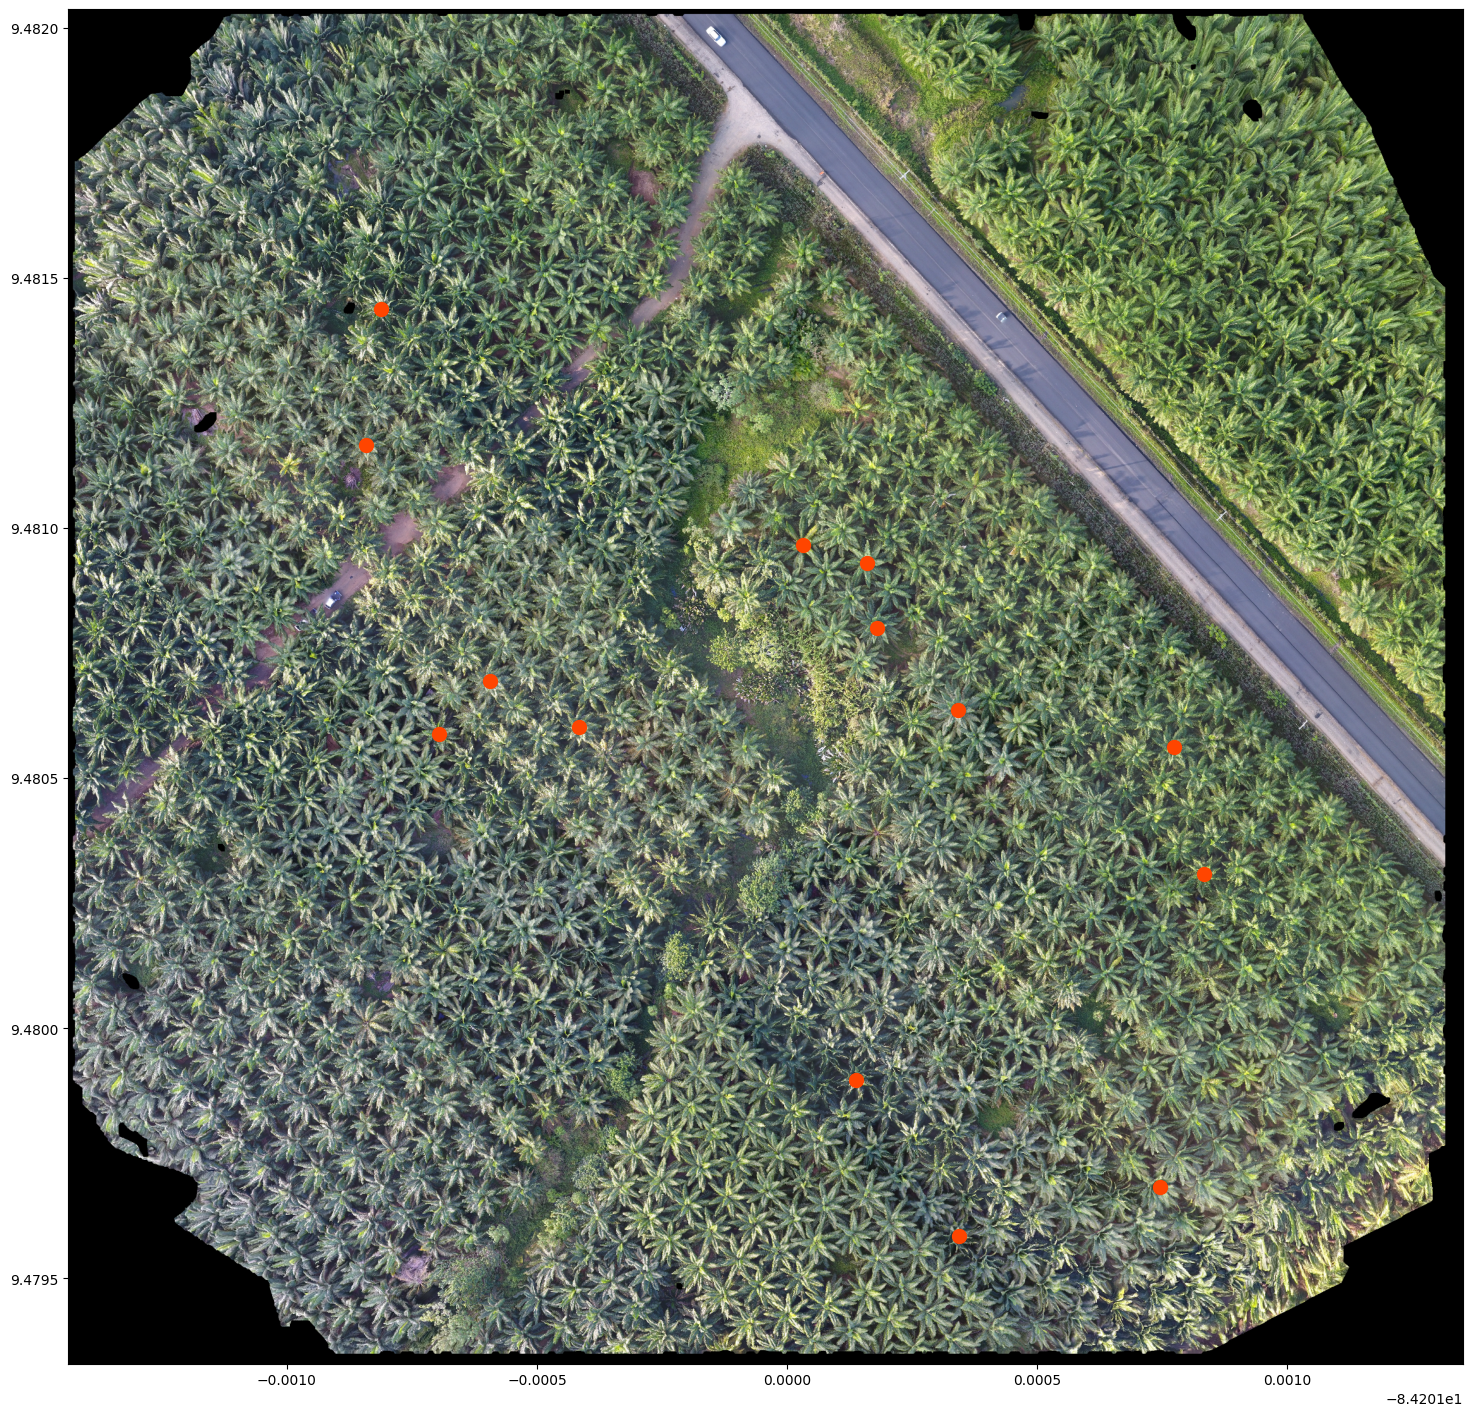

In [6]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(18,18))
pointData.plot(ax=ax, color='orangered', markersize=100)
show(palmRaster, ax=ax)

In [7]:
#selected band: green
greenBand = palmRaster.read(2)

In [8]:
#extract point value from raster
surveyRowCol = []
for index, values in pointData.iterrows():
    x = values['geometry'].xy[0][0]
    y = values['geometry'].xy[1][0]
    row, col = palmRaster.index(x,y)
    print("Point N°:%d corresponds to row, col: %d, %d"%(index,row,col))
    surveyRowCol.append([row,col])

Point N°:0 corresponds to row, col: 848, 1162
Point N°:1 corresponds to row, col: 875, 1263
Point N°:2 corresponds to row, col: 689, 471
Point N°:3 corresponds to row, col: 1693, 1246
Point N°:4 corresponds to row, col: 1940, 1408
Point N°:5 corresponds to row, col: 1864, 1727
Point N°:6 corresponds to row, col: 1368, 1796
Point N°:7 corresponds to row, col: 1168, 1748
Point N°:8 corresponds to row, col: 979, 1279
Point N°:9 corresponds to row, col: 1108, 1407
Point N°:10 corresponds to row, col: 1147, 586
Point N°:11 corresponds to row, col: 473, 494
Point N°:12 corresponds to row, col: 1062, 667
Point N°:13 corresponds to row, col: 1136, 808


In [9]:
# number of template images
print('Number of template images: %d'%len(surveyRowCol))
# define ratio of analysis
radio = 25

Number of template images: 14


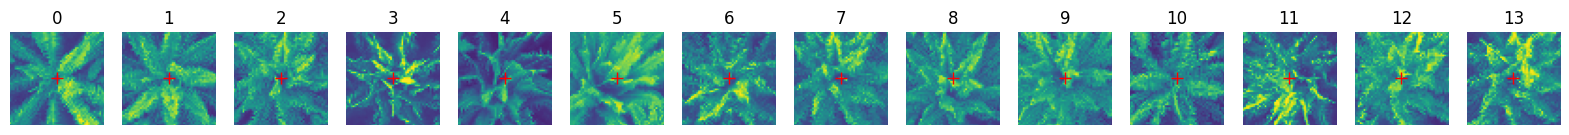

In [10]:
#show all the points of interest, please be careful to have a complete image, otherwise the model wont run
fig, ax = plt.subplots(1, len(surveyRowCol),figsize=(20,5))

for index, item in enumerate(surveyRowCol):
    row = item[0]
    col = item[1]
    ax[index].imshow(greenBand)
    ax[index].plot(col,row,color='red', linestyle='dashed', marker='+',
     markerfacecolor='blue', markersize=8)
    ax[index].set_xlim(col-radio,col+radio)
    ax[index].set_ylim(row-radio,row+radio)
    ax[index].axis('off')
    ax[index].set_title(index)
